In [1]:
import pickle as pkl

import torch

from ddpm.ddmp_multinomial import Diffusion

In [2]:
with open("../data/pickles/50_salads_one_hot.pkl", "rb") as f:
    dataset = pkl.load(f)

In [3]:
with open("../data/pickles/50salads_target.pkl", "rb") as f:
    temp = pkl.load(f)

In [4]:
from dataset.dataset import SaladsDataset
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

train_dataset, test_dataset = train_test_split(dataset, train_size=0.8, shuffle=True, random_state=17)
train_salads = SaladsDataset(train_dataset)
test_salads = SaladsDataset(test_dataset)

train_loader = DataLoader(
    train_salads,
    batch_size=10,
    collate_fn=lambda batch: pad_sequence(batch, batch_first=True, padding_value=-1)
)
test_loader = DataLoader(
    test_salads,
    batch_size=10,
    collate_fn=lambda batch: pad_sequence(batch, batch_first=True, padding_value=-1)
)

In [5]:
victim = next(iter(train_loader)).permute(0, 2, 1)

In [6]:
temp2 = victim.double().to("cuda")

In [7]:
temp2.shape

torch.Size([10, 19, 6584])

In [9]:
diffuser = Diffusion(noise_steps=200)

In [10]:
t = diffuser.sample_timesteps(temp2.shape[0]).to("cuda")

In [11]:
t

tensor([ 88, 184, 127,  67,  69,  12, 167, 196,  55,  50], device='cuda:0')

In [12]:
x_t, eps = diffuser.noise_data(temp2, t)

KeyboardInterrupt: 

In [12]:
from src.denoisers.UnetDenoiser import UnetDenoiser

model = UnetDenoiser(19, 19, 6584, 128, "cuda").to("cuda")

In [13]:
model(x_t.float(), t.float())

ERROR! Session/line number was not unique in database. History logging moved to new session 218


tensor([[[ 0.4355,  0.4279,  0.8490,  ...,  0.8727,  0.4341,  1.1588],
         [ 0.0712, -0.0865,  0.4550,  ...,  0.6751,  0.4271,  0.5068],
         [-0.4031, -0.5460,  0.3195,  ...,  0.5228,  0.1884,  0.5502],
         ...,
         [ 0.3839, -0.1651, -0.8033,  ...,  0.2512,  0.0898,  0.1498],
         [ 0.1670, -0.2241, -0.2958,  ..., -0.1461,  0.2614, -0.1255],
         [-0.0841,  0.1751, -0.3773,  ..., -0.3929,  0.7829, -0.5099]],

        [[ 0.2364,  0.4050,  0.8047,  ..., -0.3621, -0.2066,  0.2873],
         [-0.4098, -0.1003,  0.0720,  ..., -0.5330,  0.3601, -0.1344],
         [-0.0510,  0.0586,  0.3071,  ...,  0.4373,  0.2036,  0.5619],
         ...,
         [ 0.2722, -0.1322,  0.0191,  ..., -0.5555,  0.4708,  0.3151],
         [-0.0568, -0.1975,  0.2429,  ...,  0.3730,  0.5565,  0.0851],
         [ 0.0706, -0.1271,  0.3143,  ...,  0.4036,  0.2741, -0.2531]],

        [[ 0.1720,  0.4396,  1.4391,  ..., -0.0277,  0.2064,  0.5989],
         [-0.2654,  0.0979,  0.9508,  ...,  0

In [ ]:
from ddpm.modules import UNet_conditional

In [ ]:
model_cunt = UNet_conditional().to("cuda").float()

In [ ]:
diffusion_cunt = Diffusion(noise_steps=256)
t_c = diffusion_cunt.sample_timesteps(10).to("cuda")

In [ ]:
import torch

victim_cunt = torch.rand(10, 3, 128, 128).to("cuda")

In [ ]:
model_cunt(victim_cunt.float(), t_c.float(), None)

C:\Users\user\AppData\Local\Temp\ipykernel_11228\3801566455.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


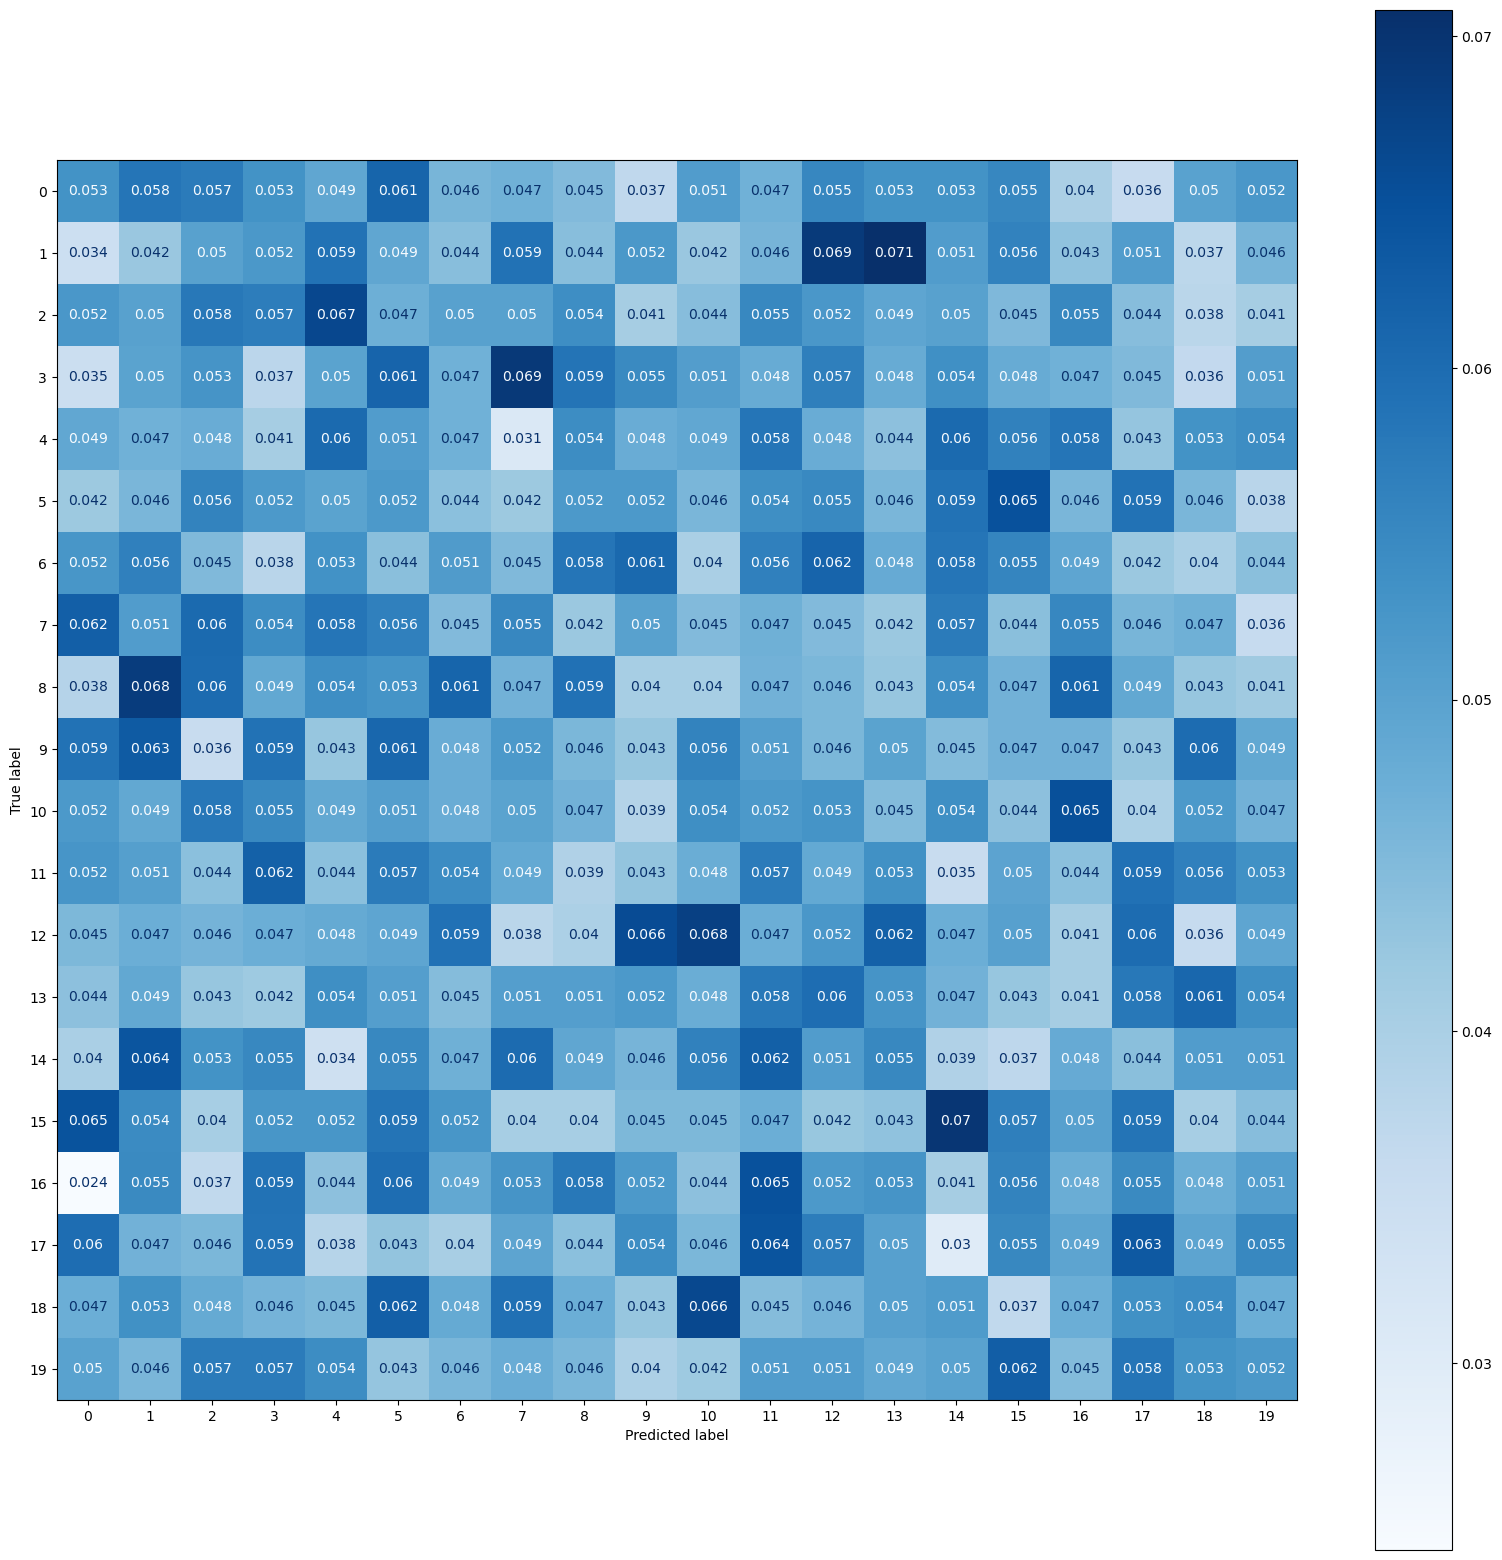

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_real = np.random.randint(0, 20, size=20000)
y_pred = np.random.randint(0, 20, size=20000)
cm = confusion_matrix(y_real, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(20, 20))
disp.plot(cmap=plt.cm.Blues, ax=ax)
fig.show()

In [10]:
import torch.nn.functional as F

F.pad(torch.tensor(dataset[0]), (0, 1, 0, 0), mode='constant', value=0).shape

torch.Size([5687, 20])

In [47]:
from torch.nn.utils.rnn import pad_sequence

t = pad_sequence([F.pad(torch.tensor(d), (0, 1, 0, 0), mode='constant', value=0) for d in dataset], batch_first=True, padding_value=-1)

In [31]:
def replace_values(x):
    # Replace -1 with 1 in the last column
    last_column = x[:, -1]
    last_column = torch.where(last_column == -1, torch.tensor(1), last_column)
    x[:, -1] = last_column
    
    # Replace -1 with 0
    x = torch.where(x == -1, torch.tensor(0), x)

    return x

torch.tensor([replace_values(ti) for ti in t])

ValueError: only one element tensors can be converted to Python scalars

In [48]:
for ti in t:
    print(ti)
    break

tensor([[ 0.,  0.,  0.,  ...,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  1.,  0.,  0.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]], dtype=torch.float64)


In [49]:
import torch

def replace_values(tensor):
    # Replace -1 with 1 in the last column
    last_column = tensor[:, -1]
    last_column = torch.where(last_column == -1, torch.tensor(1), last_column)
    tensor[:, -1] = last_column
    
    # Replace -1 with 0
    tensor = torch.where(tensor == -1, torch.tensor(0), tensor)

    return tensor

In [50]:
len([ti for ti in t])

40

In [51]:
kys = [replace_values(ti) for ti in t]
len(kys)

40

In [57]:
torch.stack(kys).shape

torch.Size([40, 6584, 20])